In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [6]:
df = df.rename(columns={'Unnamed: 0': 'Serial No'})


In [7]:
df.head()

Serial No                track_id                 artists  \
0          0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1          1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2          2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3          3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4          4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [8]:
df.columns

Index(['Serial No', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [9]:
df['track_id'].nunique()

89741

In [10]:
### object columns
print('track_id      :', df['track_id'].unique())

track_id      : ['5SuOikwiRyPMVoIQDJUgSV' '4qPNDBW1i3p13qLCt0Ki3A'
 '1iJBSr7s7jYXzM8EGcbK5b' ... '6x8ZfSoqDjuNa5SVP5QjvX'
 '2e6sXL2bYv4bSz6VTdnfLs' '2hETkH7cOfqmz3LqZDHZf5']


In [11]:
df['artists'].nunique()

31437

In [12]:
print('artists:', df['artists'].unique())


artists: ['Gen Hoshino' 'Ben Woodward' 'Ingrid Michaelson;ZAYN' ...
 'Cuencos Tibetanos Sonidos Relajantes'
 'Bryan & Katie Torwalt;Brock Human' 'Jesus Culture']


In [13]:
df['album_name'].nunique()

46589

In [14]:
print('album_name:', df['album_name'].unique())

album_name: ['Comedy' 'Ghost (Acoustic)' 'To Begin Again' ...
 '#20 Sueños Vividos - Música Intrumental Suave 2018 para Dormir Bien y Relajarse Profundamente'
 'Frecuencias Álmicas en 432hz (Solo Piano)' 'Revelation Songs']


In [15]:
df['track_name'].nunique()

73608

In [16]:
print('track_name:', df['track_name'].unique())

track_name: ['Comedy' 'Ghost - Acoustic' 'To Begin Again' ... 'Water Into Light'
 'Miss Perfumado' 'Barbincor']


In [17]:
print('explicit:', df['explicit'].unique())

explicit: [False  True]


In [18]:
print('track_genre :', df['track_genre'].unique())

track_genre : ['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'se

In [19]:
print('mode:', df['mode'].unique())

mode: [0 1]


In [20]:
print('time_signature:', df['time_signature'].unique())

time_signature: [4 3 1 5 0]


In [21]:
print('track_genre:', df['track_genre'].unique())

track_genre: ['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'ser

In [22]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial No         114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [23]:
df.isnull().sum()

Serial No           0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [24]:
df.artists.replace(np.nan, df.artists.mode()[0], inplace = True)
df.album_name.replace(np.nan, df.album_name.mode()[0], inplace = True)
df.track_name.replace(np.nan, df.track_name.mode()[0], inplace = True)

In [25]:
df.describe()

Serial No     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -10.013000       0.000000   
50%         0.685000       5.000000      -7.004000       1.000000   
75%         0.854000       8.000000      -5.003000       1.000000   
max         1.000000      11.000000       4.532000       1.000000   

         speechiness   acousticness  instrumentalness       liveness  \
count  114000.000000  114000.000000     114000.000000  114000.000000   
mean        0.084652       0.314910          0.156050       0.213553   
std         0.105732       0.332523          0.309555       0.190378   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.035900       0.016900          0.000000       0.098000   
50%         0.048900       0.169000          0.000042       0.132000   
75%         0.084500       0.598000          0.049000       0.273000   
max         0.965000       0.996000          1.000000       1.000000   

             valence          tempo  time_signature  
count  114000.000000  114000.000000   114000.000000  
mean        0.474068     122.147837        3.904035  
std         0.259261      29.978197        0.432621  
min         0.000000       0.000000        0.000000  
25%         0.260000      99.218750        4.000000  
50%         0.464000     122.017000        4.000000  
75%         0.683000     140.071000        4.000000  
max         0.995000     243.372000        5.000000

### Data Visualisation

### Univariate

<Axes: ylabel='popularity'>

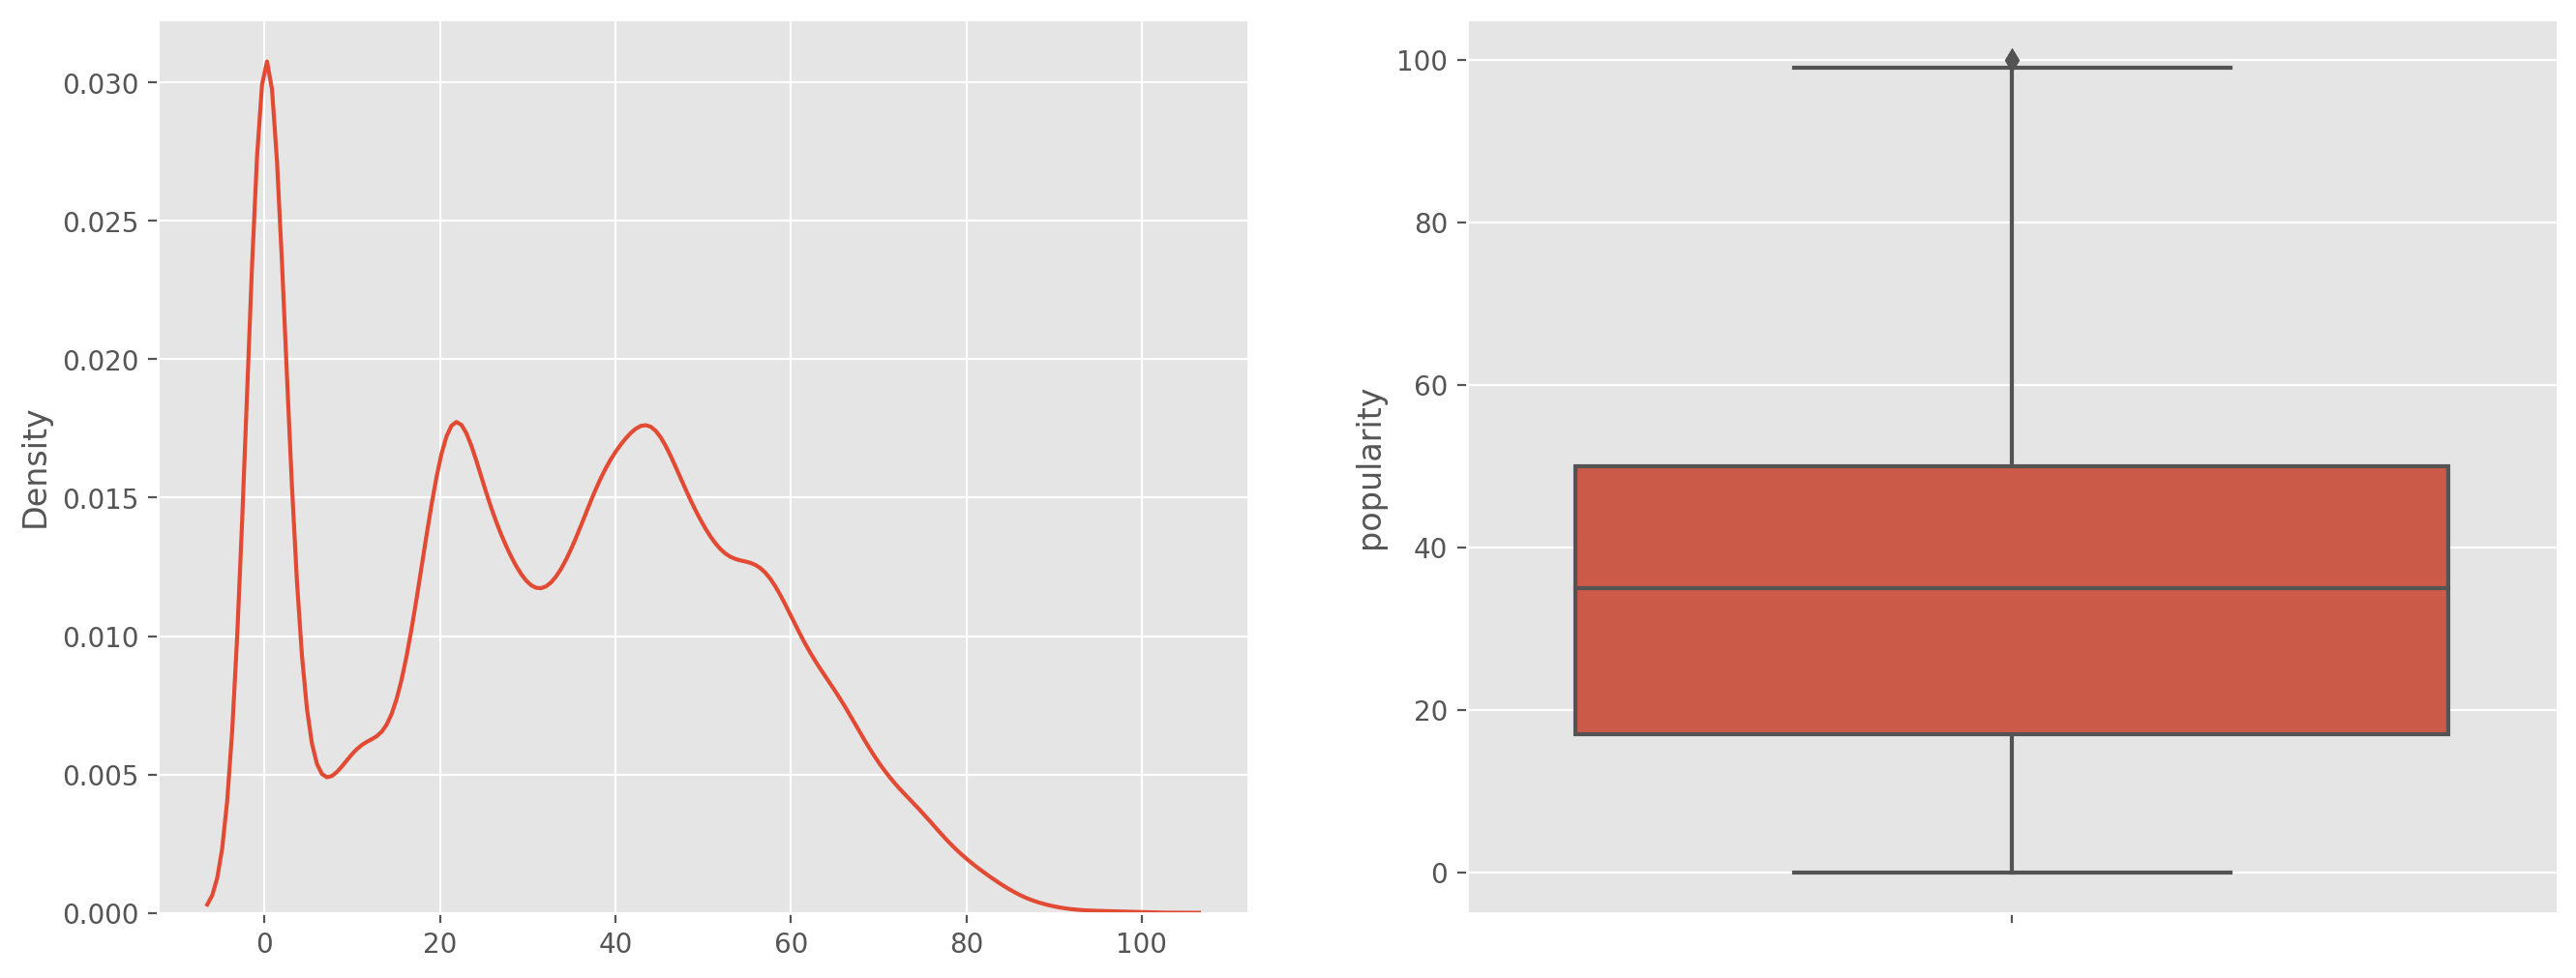

In [26]:
plt.figure(figsize = (16,6), dpi = 200)
plt.subplot(1,2,1)
sns.distplot(x=df['popularity'], hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = df['popularity'])

In [27]:
df.columns

Index(['Serial No', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

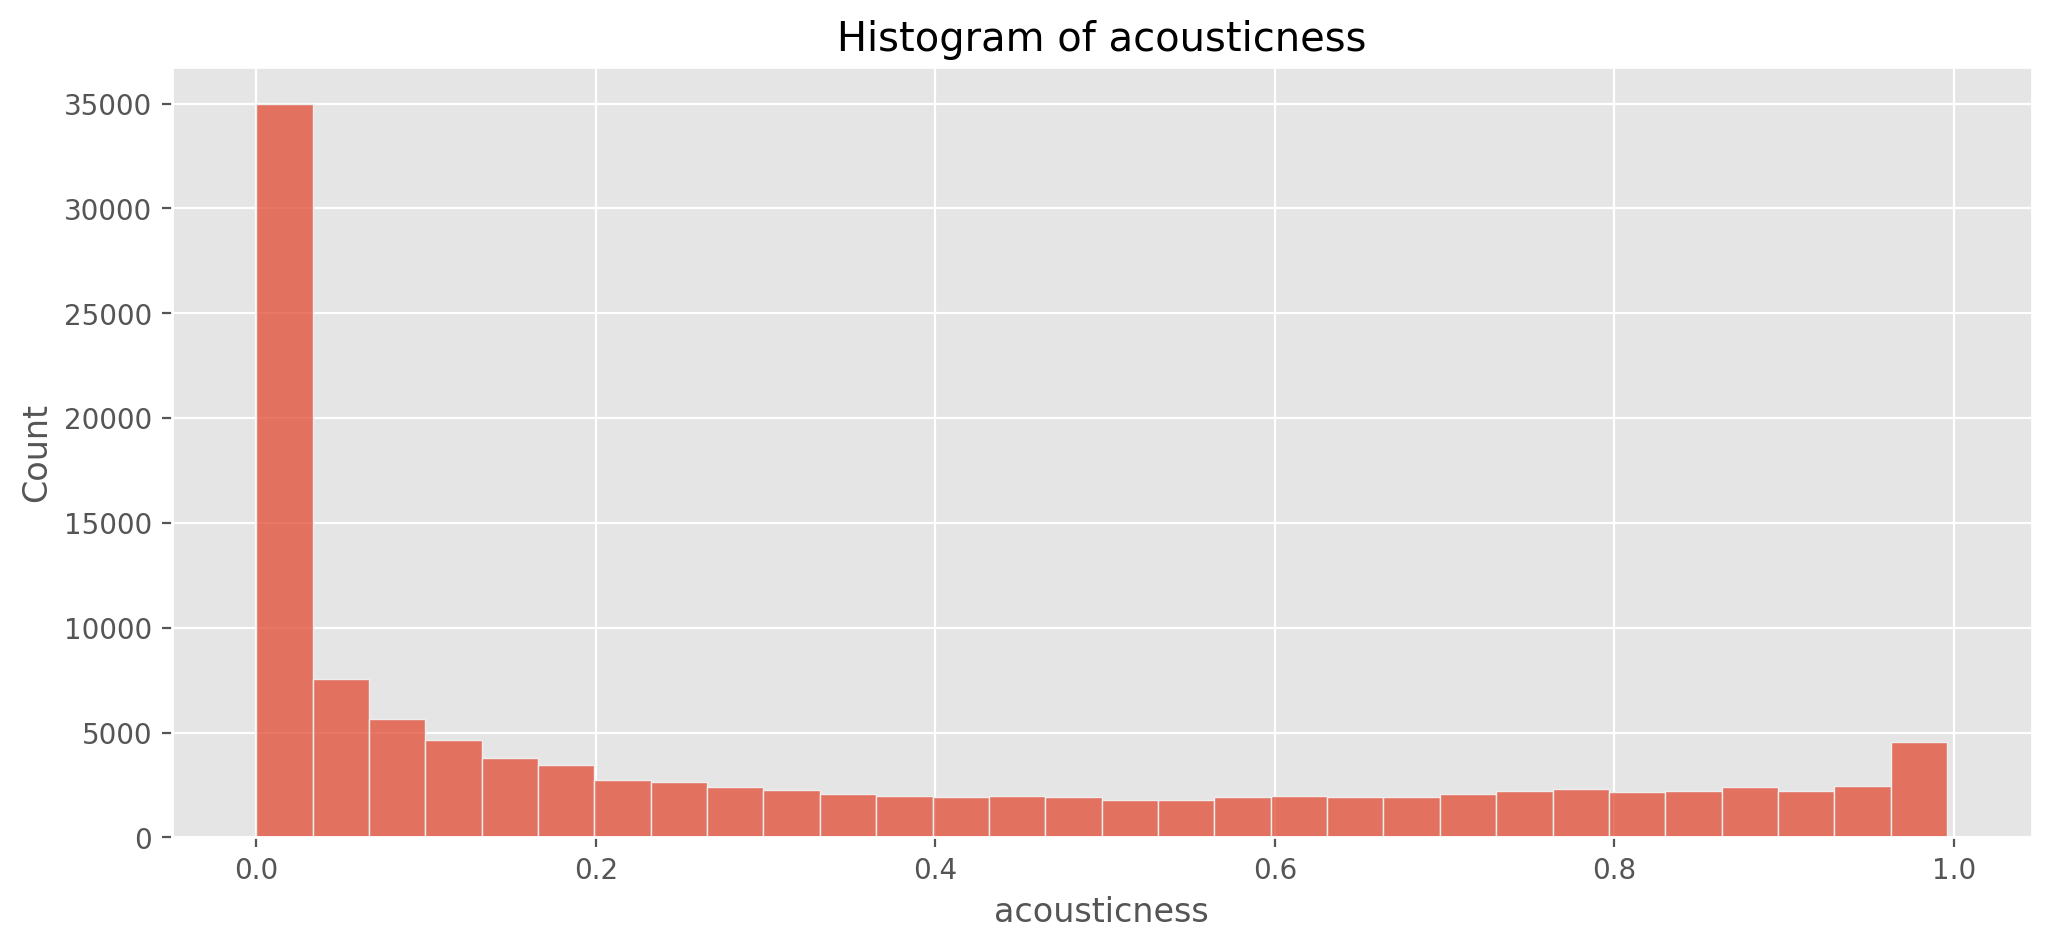

In [28]:
plt.figure(figsize=(12, 5), dpi=200)
sns.histplot(data=df, x='acousticness', bins=30)
plt.title("Histogram of acousticness")
plt.xlabel("acousticness")
plt.ylabel("Count")
plt.show()

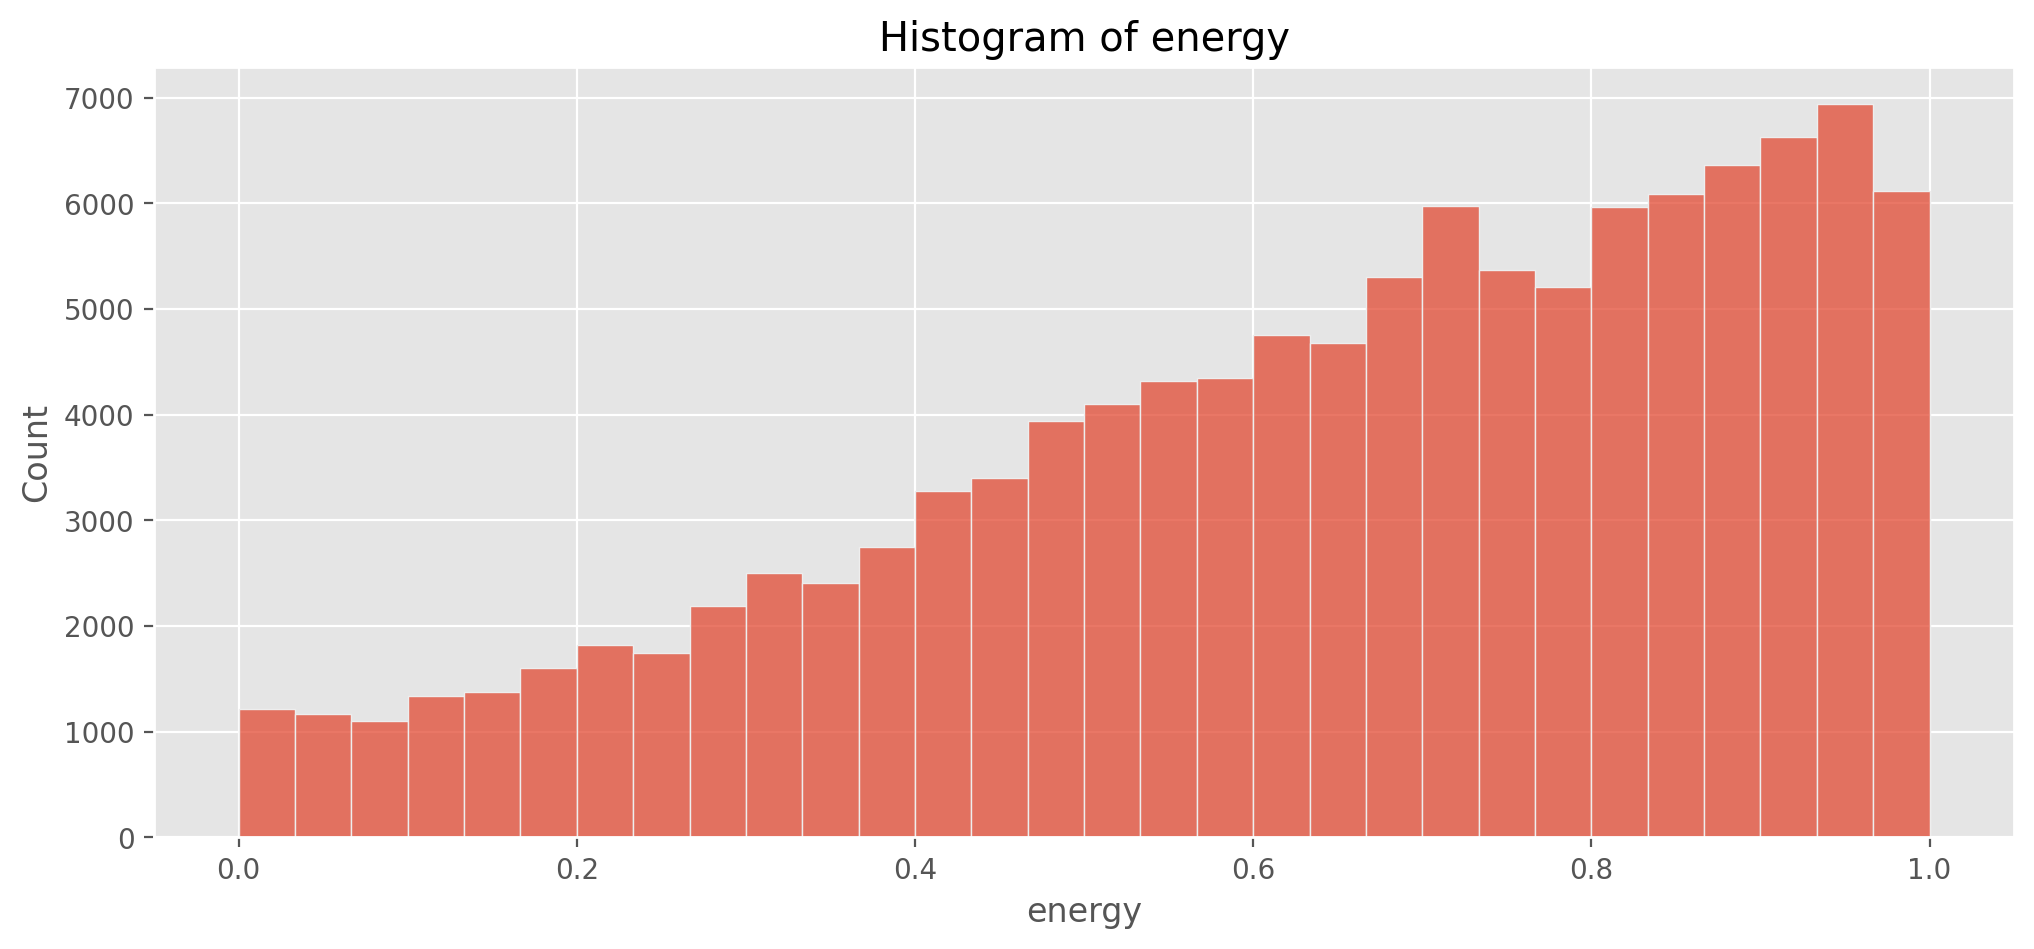

In [29]:
plt.figure(figsize=(12, 5), dpi=200)
sns.histplot(data=df, x='energy', bins=30)
plt.title("Histogram of energy")
plt.xlabel("energy")
plt.ylabel("Count")
plt.show()

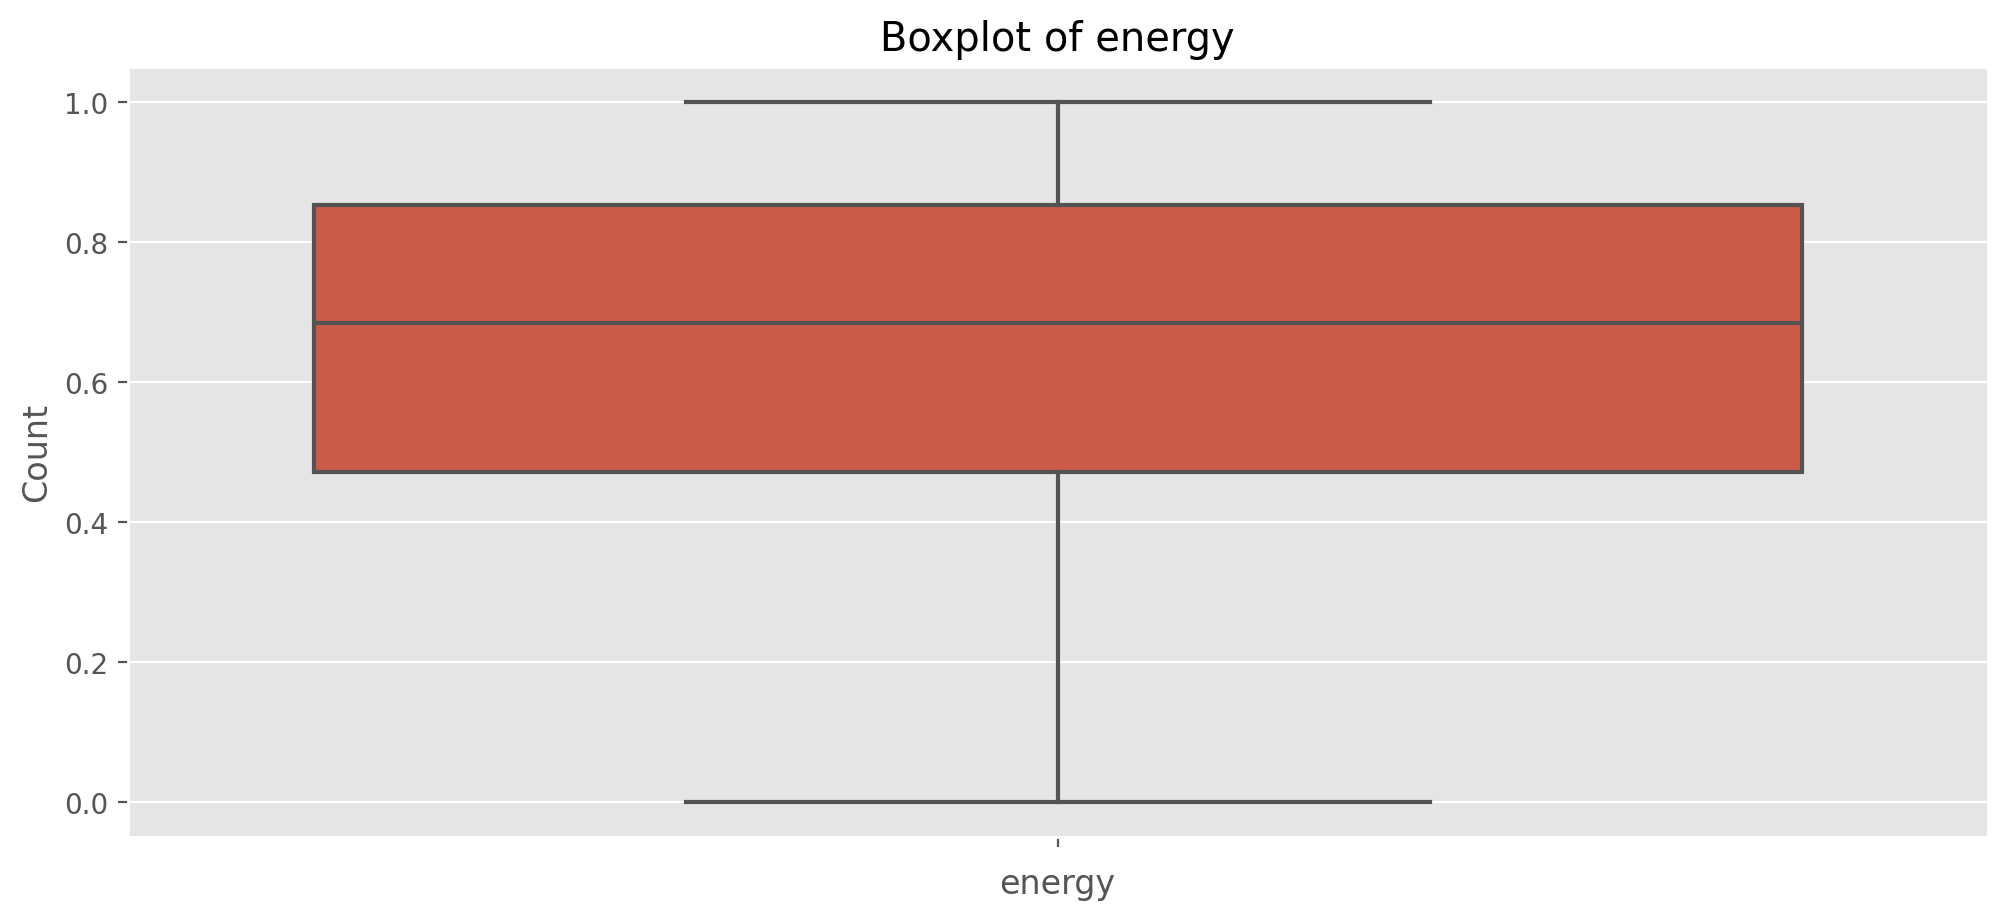

In [30]:
plt.figure(figsize=(12, 5), dpi=200)
sns.boxplot(data=df, y='energy', )
plt.title("Boxplot of energy")
plt.xlabel("energy")
plt.ylabel("Count")
plt.show()

### Bivariate

In [31]:
df.columns

Index(['Serial No', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [32]:
df.columns

Index(['Serial No', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

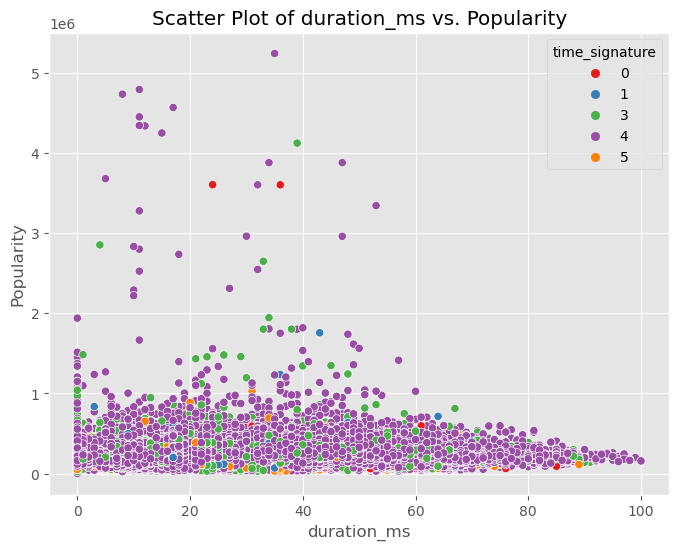

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(y='duration_ms', x='popularity', data=df, hue = 'time_signature', palette='Set1')
plt.title('Scatter Plot of duration_ms vs. Popularity')
plt.xlabel('duration_ms')
plt.ylabel('Popularity')
plt.show()

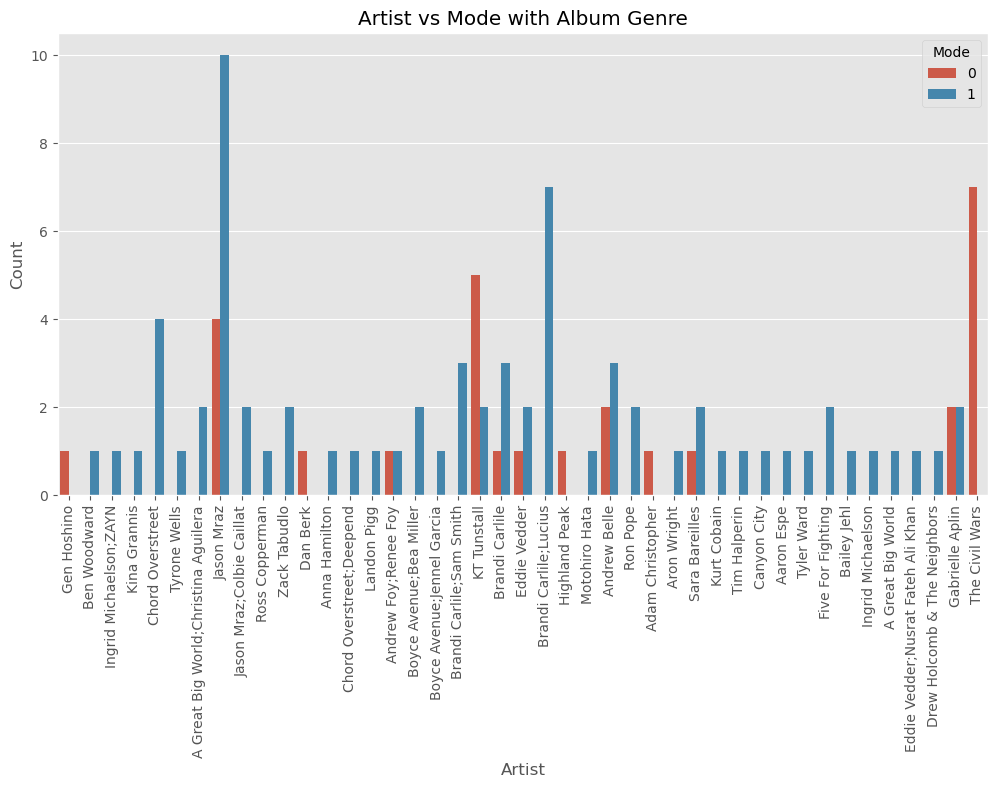

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(x='artists', hue='mode', data=df[:100])  # Changed y='album_genre' to hue='mode'
plt.xticks(rotation=90)
plt.title("Artist vs Mode with Album Genre")
plt.xlabel("Artist")
plt.ylabel("Count")
plt.legend(title='Mode')
plt.show()


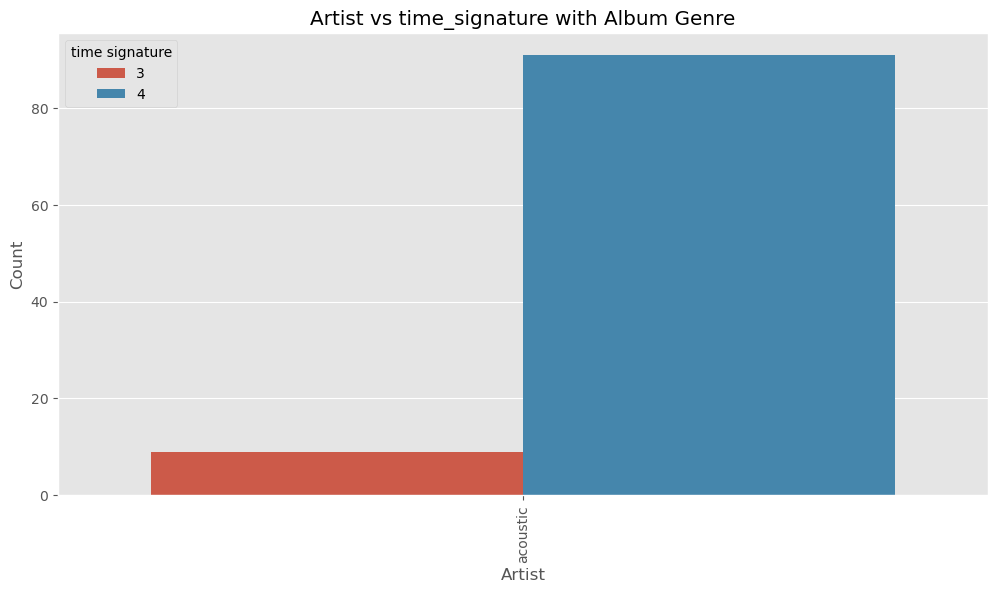

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(x='track_genre', hue='time_signature', data=df[:100])  # Changed y='album_genre' to hue='mode'
plt.xticks(rotation=90)
plt.title("Artist vs time_signature with Album Genre")
plt.xlabel("Artist")
plt.ylabel("Count")
plt.legend(title='time signature')
plt.show()


In [36]:
df.columns

Index(['Serial No', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

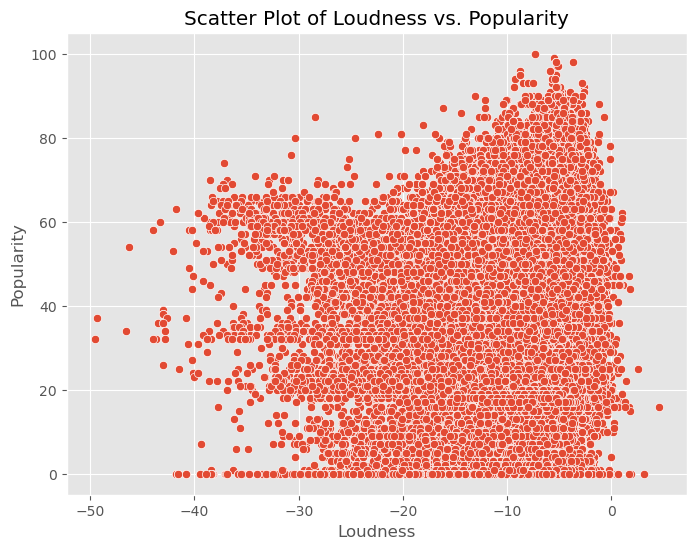

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='loudness', y='popularity', data=df)
plt.title('Scatter Plot of Loudness vs. Popularity')
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.show()

In [38]:
df.corr()

Serial No  popularity  duration_ms  explicit  danceability  \
Serial No          1.000000    0.032142    -0.032743 -0.054736      0.003444   
popularity         0.032142    1.000000    -0.007101  0.044082      0.035448   
duration_ms       -0.032743   -0.007101     1.000000 -0.065263     -0.073426   
explicit          -0.054736    0.044082    -0.065263  1.000000      0.122507   
danceability       0.003444    0.035448    -0.073426  0.122507      1.000000   
energy            -0.055994    0.001056     0.058523  0.096955      0.134325   
key               -0.005520   -0.003853     0.008114  0.004484      0.036469   
loudness          -0.027307    0.050423    -0.003470  0.108588      0.259077   
mode               0.005107   -0.013931    -0.035556 -0.037212     -0.069219   
speechiness       -0.084952   -0.044927    -0.062600  0.307952      0.108626   
acousticness       0.076840   -0.025472    -0.103788 -0.094403     -0.171533   
instrumentalness  -0.070286   -0.095139     0.124371 -0.103404     -0.185606   
liveness           0.033639   -0.005387     0.010321  0.032549     -0.131617   
valence            0.053111   -0.040534    -0.154479 -0.003381      0.477341   
tempo             -0.025824    0.013205     0.024346 -0.002816     -0.050450   
time_signature    -0.021115    0.031073     0.018225  0.038386      0.207218   

                    energy       key  loudness      mode  speechiness  \
Serial No        -0.055994 -0.005520 -0.027307  0.005107    -0.084952   
popularity        0.001056 -0.003853  0.050423 -0.013931    -0.044927   
duration_ms       0.058523  0.008114 -0.003470 -0.035556    -0.062600   
explicit          0.096955  0.004484  0.108588 -0.037212     0.307952   
danceability      0.134325  0.036469  0.259077 -0.069219     0.108626   
energy            1.000000  0.048006  0.761690 -0.078362     0.142509   
key               0.048006  1.000000  0.038590 -0.135916     0.020418   
loudness          0.761690  0.038590  1.000000 -0.041764     0.060826   
mode             -0.078362 -0.135916 -0.041764  1.000000    -0.046532   
speechiness       0.142509  0.020418  0.060826 -0.046532     1.000000   
acousticness     -0.733906 -0.040937 -0.589803  0.095553    -0.002186   
instrumentalness -0.181879 -0.006823 -0.433477 -0.049955    -0.089616   
liveness          0.184796 -0.001600  0.076899  0.014012     0.205219   
valence           0.258934  0.034103  0.279848  0.021953     0.036635   
tempo             0.247851  0.010917  0.212446  0.000566     0.017273   
time_signature    0.187126  0.015065  0.191992 -0.024092    -0.000011   

                  acousticness  instrumentalness  liveness   valence  \
Serial No             0.076840         -0.070286  0.033639  0.053111   
popularity           -0.025472         -0.095139 -0.005387 -0.040534   
duration_ms          -0.103788          0.124371  0.010321 -0.154479   
explicit             -0.094403         -0.103404  0.032549 -0.003381   
danceability         -0.171533         -0.185606 -0.131617  0.477341   
energy               -0.733906         -0.181879  0.184796  0.258934   
key                  -0.040937         -0.006823 -0.001600  0.034103   
loudness             -0.589803         -0.433477  0.076899  0.279848   
mode                  0.095553         -0.049955  0.014012  0.021953   
speechiness          -0.002186         -0.089616  0.205219  0.036635   
acousticness          1.000000          0.104027 -0.020700 -0.107070   
instrumentalness      0.104027          1.000000 -0.079893 -0.324312   
liveness             -0.020700         -0.079893  1.000000  0.019086   
valence              -0.107070         -0.324312  0.019086  1.000000   
tempo                -0.208224         -0.050330  0.000600  0.078273   
time_signature       -0.176138         -0.082580 -0.023651  0.133686   

                     tempo  time_signature  
Serial No        -0.025824       -0.021115  
popularity        0.013205        0.031073  
duration_ms       0.024346        0.018225  
explicit  

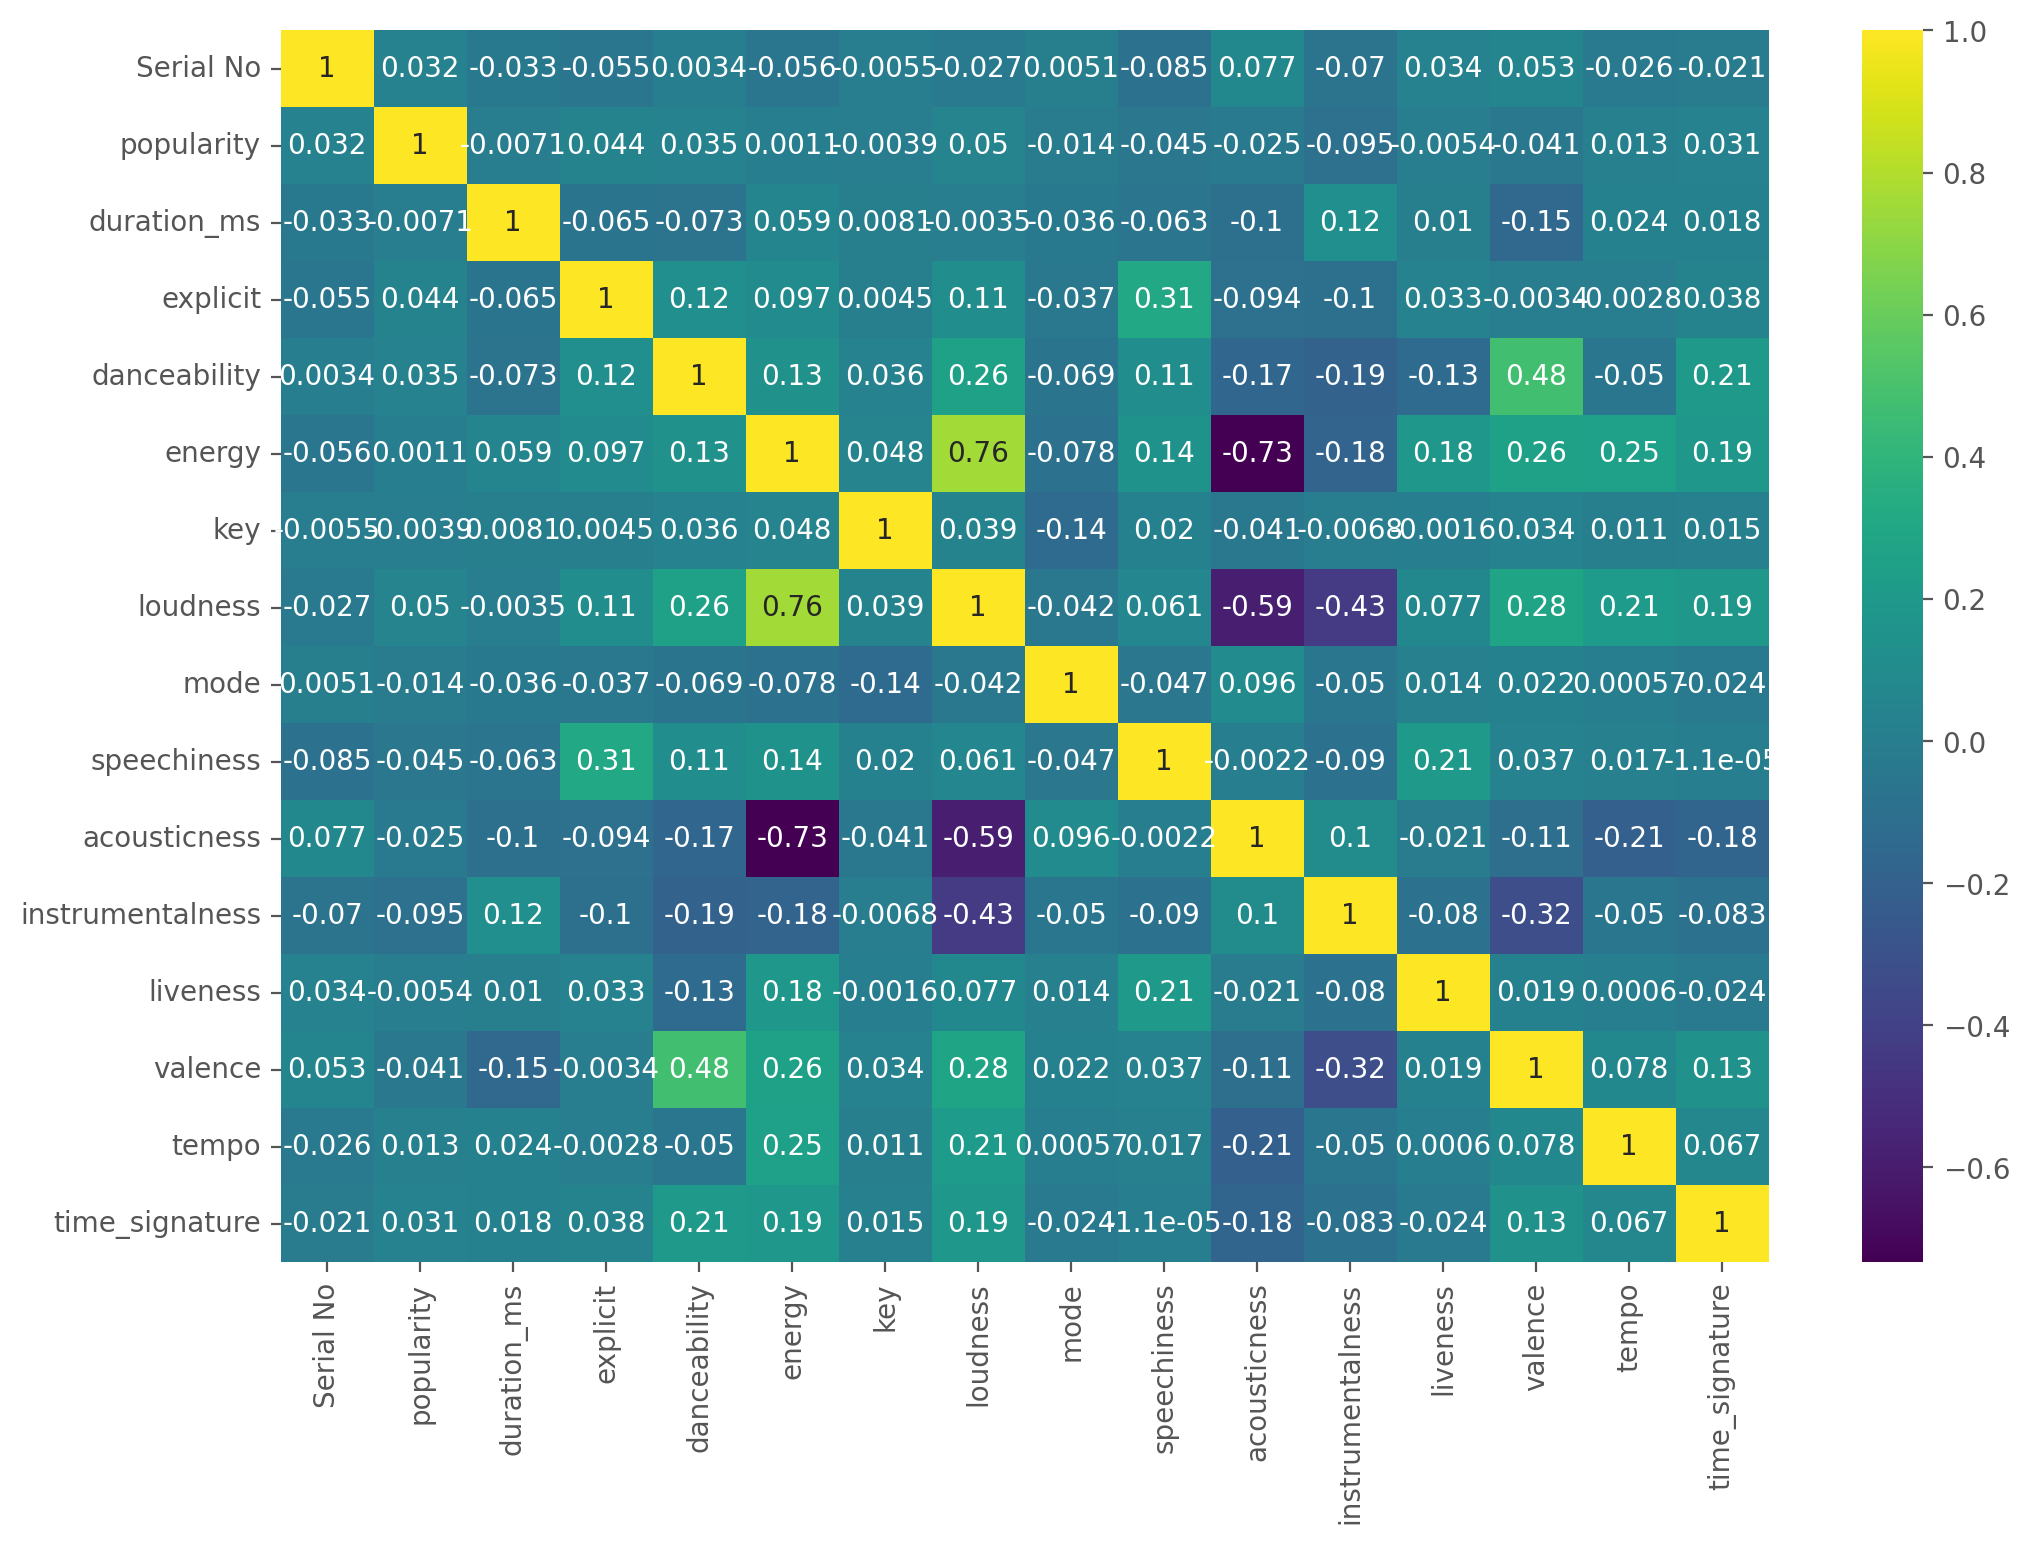

In [39]:
plt.figure(figsize=(12, 8), dpi=200)

correlation = df.corr() 

sns.heatmap(correlation, cmap='viridis', annot=True)

# Show the plot
plt.show()


### Data preprocessing

In [40]:
cols = [ 'artists', 'album_name']
X = df[cols]
Y = df[['popularity']]

In [41]:
X.head()

artists                                         album_name
0             Gen Hoshino                                             Comedy
1            Ben Woodward                                   Ghost (Acoustic)
2  Ingrid Michaelson;ZAYN                                     To Begin Again
3            Kina Grannis  Crazy Rich Asians (Original Motion Picture Sou...
4        Chord Overstreet                                            Hold On

In [42]:
Y.head()

popularity
0          73
1          55
2          57
3          71
4          82

In [43]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Assuming 'df' is your DataFrame
columns_to_encode = ['artists', 'album_name','track_id',
                    'track_name','explicit','track_genre']

# Convert columns to appropriate data types (optional)
df[columns_to_encode] = df[columns_to_encode].astype('category')

# Fit the LabelEncoder on all specified columns
df[columns_to_encode] = df[columns_to_encode].apply(lambda col: label_encoder.fit_transform(col))

# Display the modified dataset
print(df.head())


   Serial No  track_id  artists  album_name  track_name  popularity  \
0          0     62846    10357        8100       11741          73   
1          1     55668     3287       14796       22528          55   
2          2     19766    12397       39162       60774          57   
3          3     77942    14839        8580        9580          71   
4          4     68242     5255       16899       25689          82   

   duration_ms  explicit  danceability  energy  ...  loudness  mode  \
0       230666         0         0.676  0.4610  ...    -6.746     0   
1       149610         0         0.420  0.1660  ...   -17.235     1   
2       210826         0         0.438  0.3590  ...    -9.734     1   
3       201933         0         0.266  0.0596  ...   -18.515     1   
4       198853         0         0.618  0.4430  ...    -9.681     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.1430        0.0322          0.000001    0.3580    0.715   

In [44]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame
columns_to_scale = ['artists', 'album_name']

scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the modified dataset
print(df.head())

   Serial No  track_id   artists  album_name  track_name  popularity  \
0          0     62846  0.329463    0.173865       11741          73   
1          1     55668  0.104562    0.317593       22528          55   
2          2     19766  0.394357    0.840603       60774          57   
3          3     77942  0.472038    0.184168        9580          71   
4          4     68242  0.167165    0.362733       25689          82   

   duration_ms  explicit  danceability  energy  ...  loudness  mode  \
0       230666         0         0.676  0.4610  ...    -6.746     0   
1       149610         0         0.420  0.1660  ...   -17.235     1   
2       210826         0         0.438  0.3590  ...    -9.734     1   
3       201933         0         0.266  0.0596  ...   -18.515     1   
4       198853         0         0.618  0.4430  ...    -9.681     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.1430        0.0322          0.000001    0.3580    0.

In [45]:
X = df[['artists', 'album_name']].values
X[:5]

array([[0.32946304, 0.17386451],
       [0.10456165, 0.31759251],
       [0.39435679, 0.84060273],
       [0.47203843, 0.1841676 ],
       [0.16716503, 0.36273289]])

In [46]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 7)
km.fit(X)

KMeans(n_clusters=7)

In [47]:
y_kmeans = km.predict(X)
y_kmeans

array([5, 0, 3, ..., 0, 5, 6])

In [48]:
km.cluster_centers_

array([[0.14855197, 0.20753307],
       [0.77050097, 0.50251414],
       [0.84238475, 0.83767887],
       [0.47070695, 0.76723681],
       [0.79716839, 0.14599197],
       [0.43773544, 0.26759515],
       [0.15634517, 0.71547332]])

In [49]:
X[120:130]

array([[0.58223056, 0.46230789],
       [0.15389999, 0.37273547],
       [0.4370467 , 0.90881772],
       [0.7461191 , 0.36311926],
       [0.40269118, 0.92699837],
       [0.10456165, 0.10526316],
       [0.37841965, 0.75626771],
       [0.10449803, 0.49405426],
       [0.57271918, 0.7376363 ],
       [0.71112737, 0.73877393]])

In [50]:
y_kmeans[120:130]

array([1, 0, 3, 1, 3, 0, 3, 6, 3, 2])

In [51]:
km.inertia_      

2831.9157851074406

In [52]:
# Extracting all data points belonging to cluster 0
X[y_kmeans == 0]

array([[0.10456165, 0.31759251],
       [0.16716503, 0.36273289],
       [0.00648938, 0.40278613],
       ...,
       [0.2571574 , 0.00085859],
       [0.1345591 , 0.38394007],
       [0.1575264 , 0.10792479]])

In [53]:
# Extracting annual income for data points belonging to cluster 0
X[y_kmeans == 0,0]

array([0.10456165, 0.16716503, 0.00648938, ..., 0.2571574 , 0.1345591 ,
       0.1575264 ])

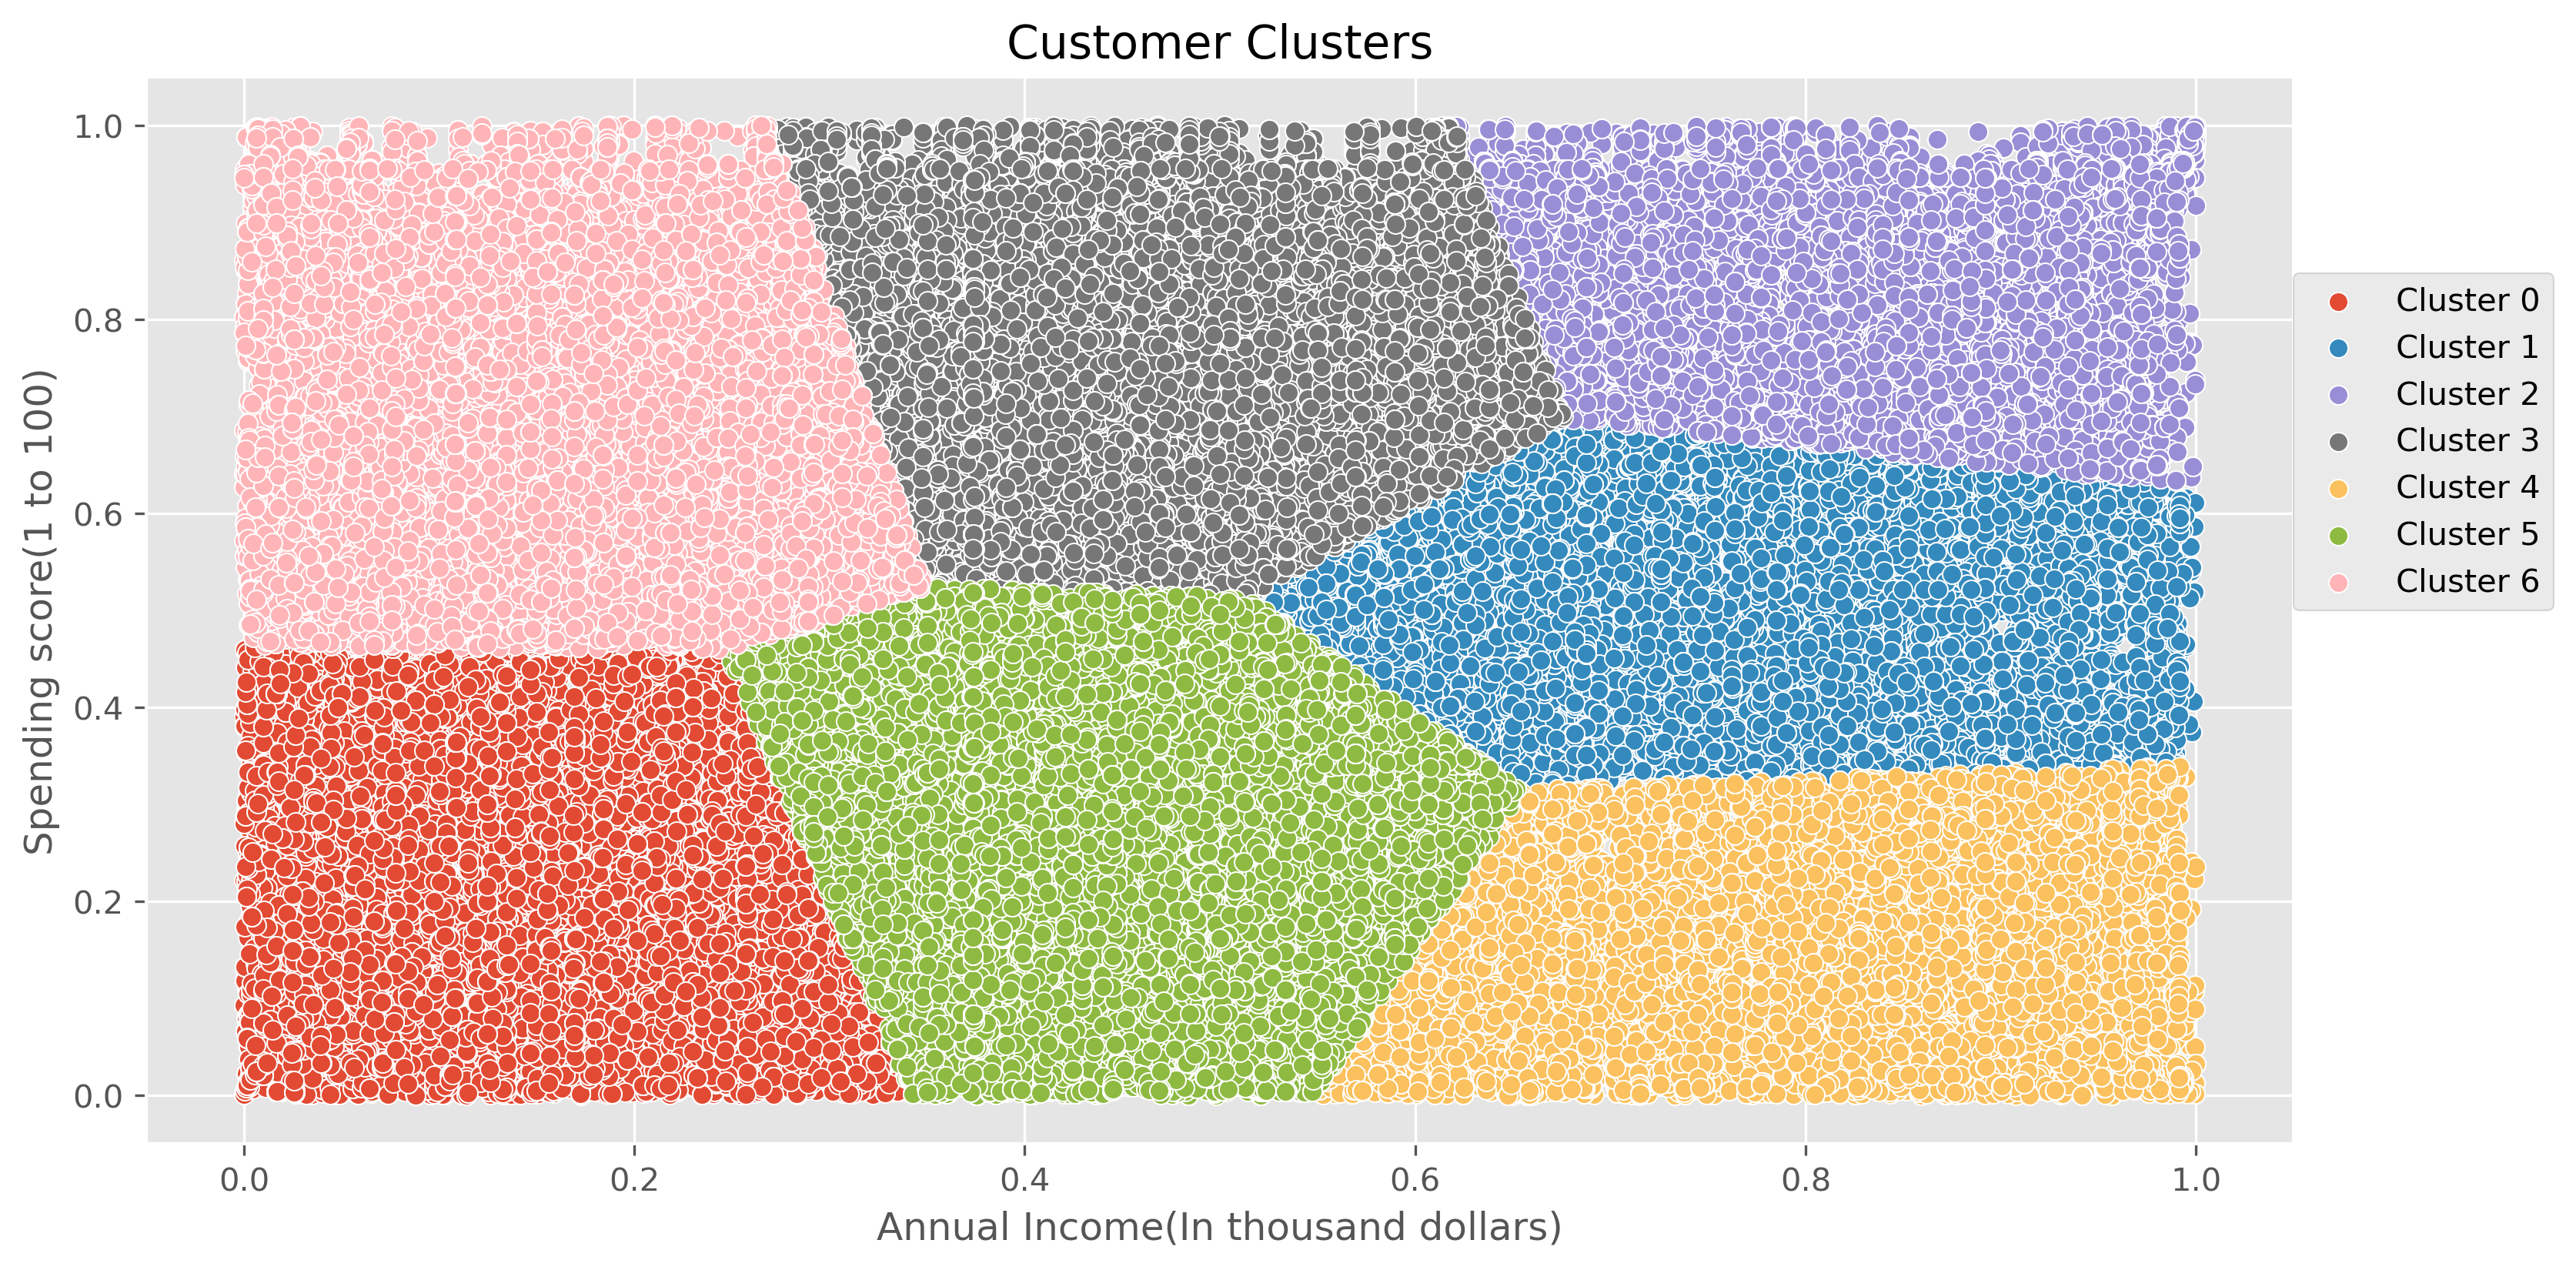

In [54]:
# Visualizing clusters
plt.figure(figsize = (12,6), dpi = 300)
sns.scatterplot(x=X[y_kmeans == 0,0], y=X[y_kmeans == 0,1], label = 'Cluster 0')
sns.scatterplot(x=X[y_kmeans == 1,0], y=X[y_kmeans == 1,1], label = 'Cluster 1')
sns.scatterplot(x=X[y_kmeans == 2,0],y= X[y_kmeans == 2,1], label = 'Cluster 2')
sns.scatterplot(x=X[y_kmeans == 3,0],y= X[y_kmeans == 3,1], label = 'Cluster 3')
sns.scatterplot(x=X[y_kmeans == 4,0],y= X[y_kmeans == 4,1], label = 'Cluster 4')
sns.scatterplot(x=X[y_kmeans == 5,0],y= X[y_kmeans == 5,1], label = 'Cluster 5')
sns.scatterplot(x=X[y_kmeans == 6,0],y= X[y_kmeans == 6,1], label = 'Cluster 6')

plt.title('Customer Clusters')
plt.xlabel('Annual Income(In thousand dollars)')
plt.ylabel('Spending score(1 to 100)')
plt.legend(loc=(1,.5))
plt.show()

In [55]:
### Elbow Method (Find the best value of K)

In [56]:
wcss = []
for k in range(1,21):
    km = KMeans(n_clusters = k)
    km.fit(X)
    wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

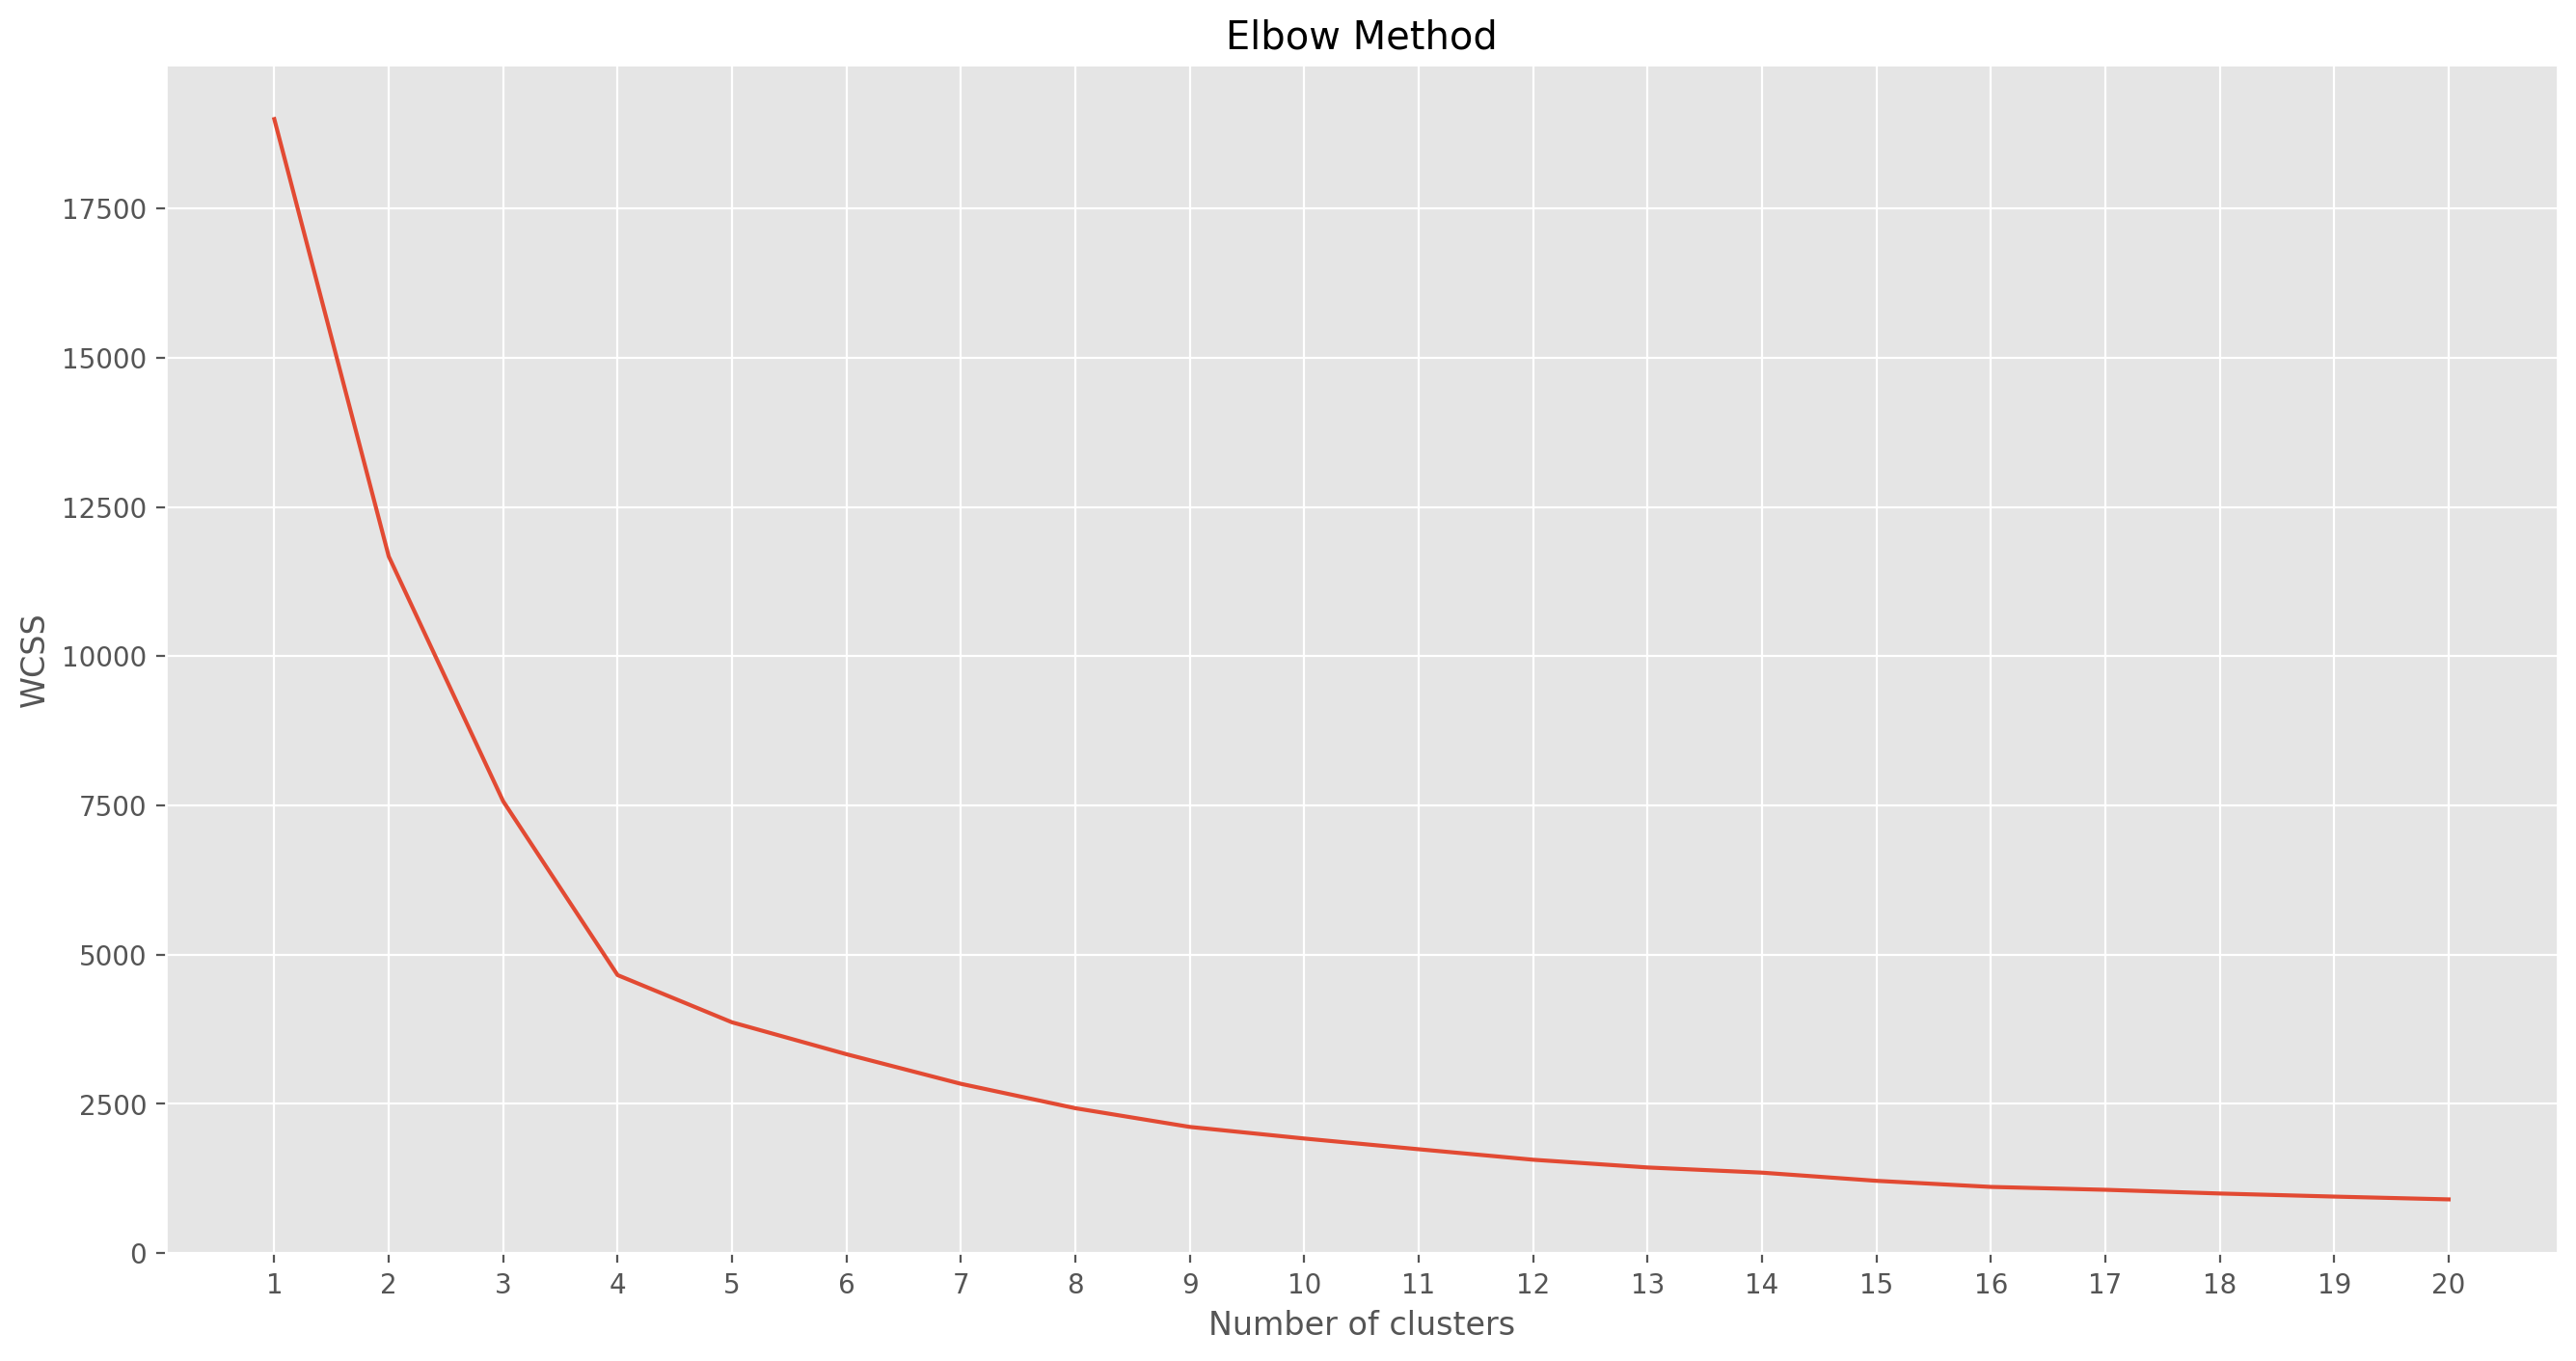

In [57]:
k = range(1,21)
plt.figure(figsize = (16,8), dpi = 200)
sns.lineplot(x=k, y=wcss)

plt.xticks(k)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [58]:
# Best model
km_best = KMeans(n_clusters = 5)
km_best.fit(X)

KMeans(n_clusters=5)

In [59]:
y_kmeans = km_best.predict(X)
y_kmeans

array([3, 3, 0, ..., 3, 4, 0])

In [60]:
centroids = km_best.cluster_centers_
centroids

array([[0.23067712, 0.76668705],
       [0.80237113, 0.77220107],
       [0.52351247, 0.48772434],
       [0.22192317, 0.21263371],
       [0.77528062, 0.19774024]])

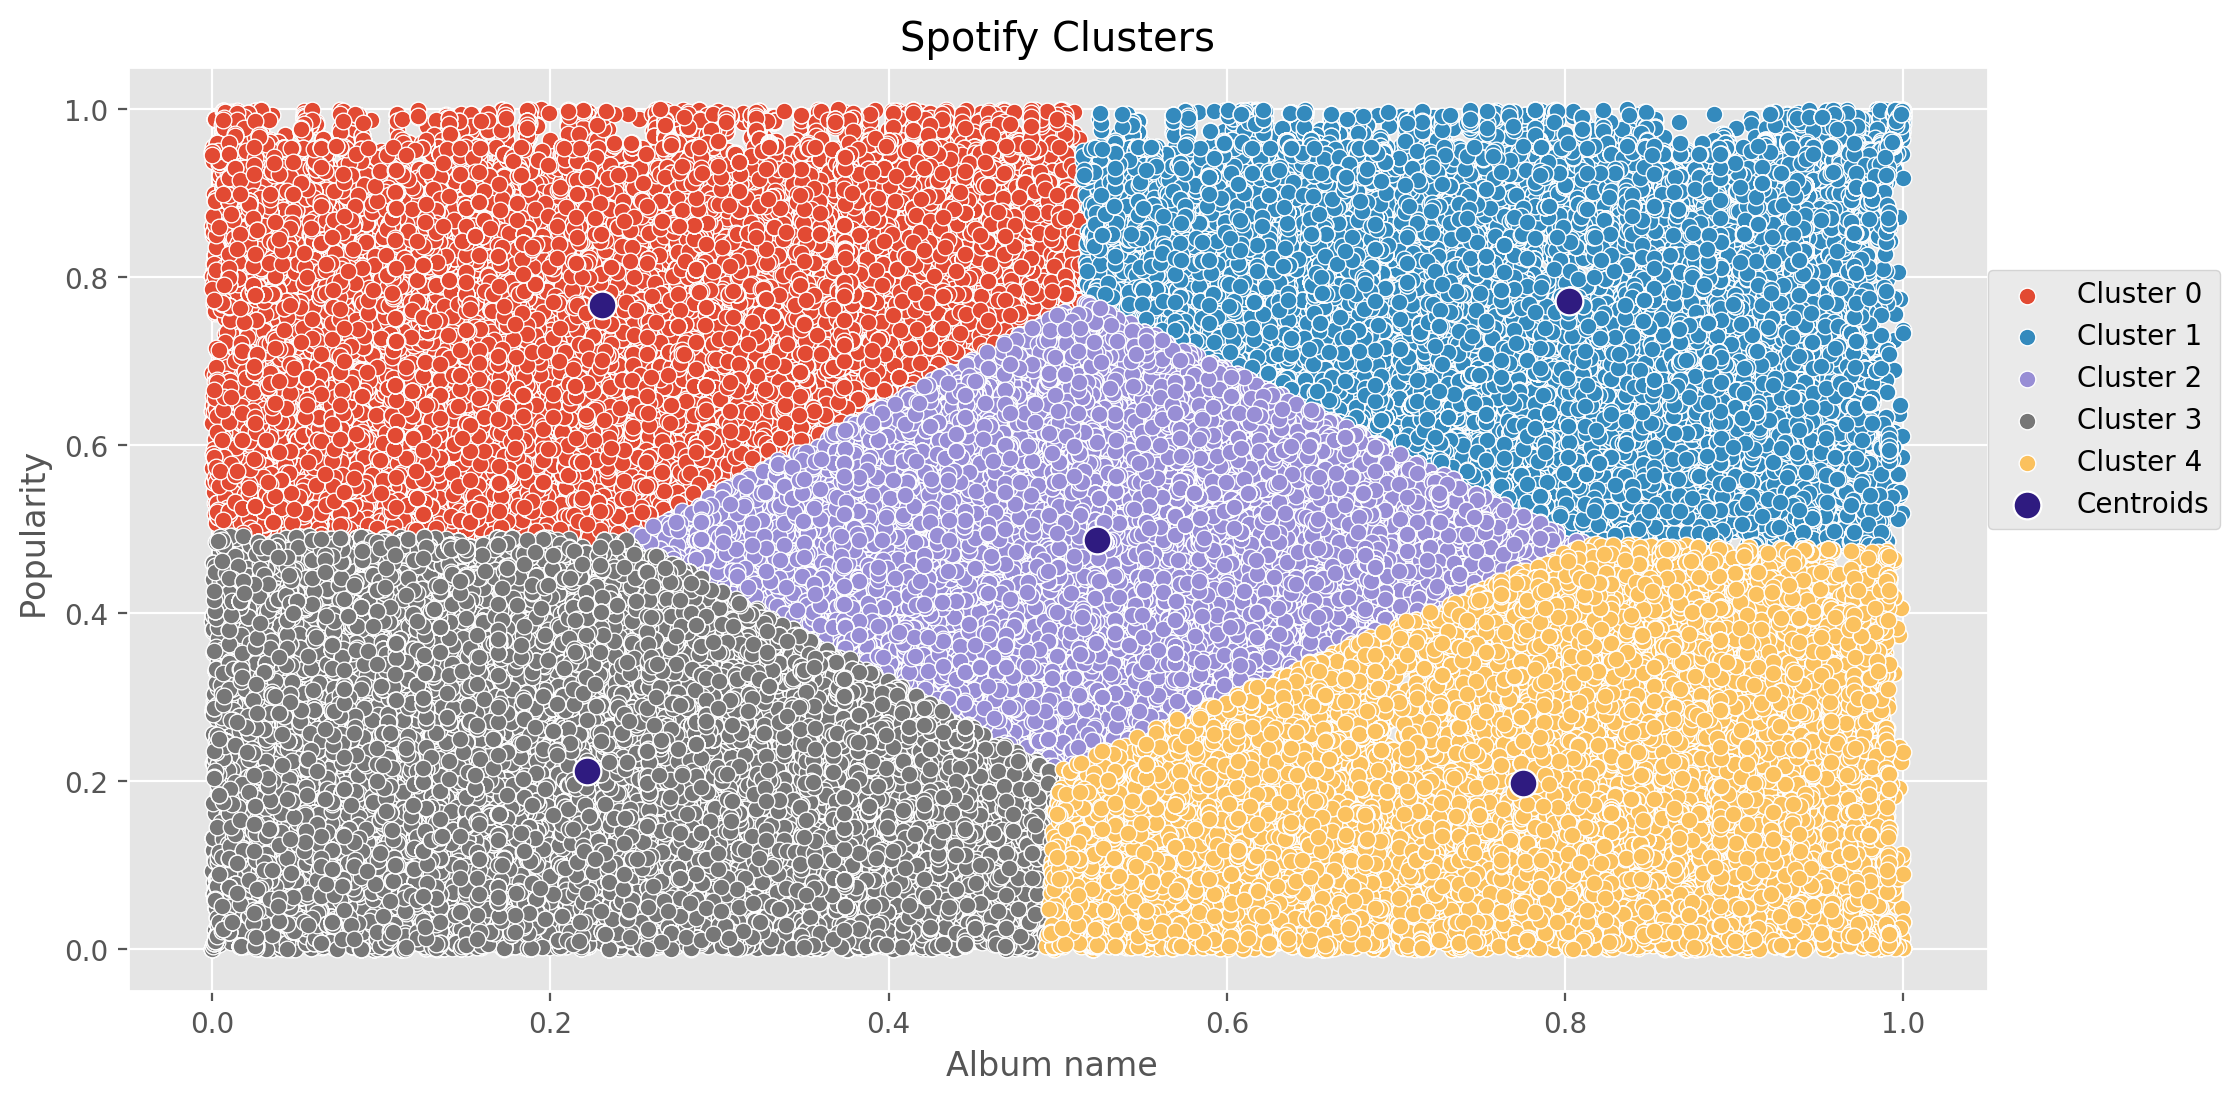

In [61]:
# Visualizing the clusters
plt.figure(figsize=(12, 6), dpi=200)

# Assuming X is a NumPy array with two dimensions
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], label='Cluster 0')
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], label='Cluster 1')
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], label='Cluster 2')
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], label='Cluster 3')
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], label='Cluster 4')
sns.scatterplot(x=X[y_kmeans == 5, 0], y=X[y_kmeans == 5, 1], label='Cluster 5')
#sns.scatterplot(x=X[y_kmeans == 6, 0], y=X[y_kmeans == 6, 1], label='Cluster 6')

sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], label='Centroids', s=100, color='#2f1b80')

plt.title('Spotify Clusters')
plt.xlabel('Album name ')
plt.ylabel('Popularity ')
plt.legend(loc=(1,.5))
plt.show()


we can use the clusters to make recommendations or classify new data points. For example, if a user likes an artist or album in a particular cluster, we can recommend similar artists or albums from the same cluster.